In [1]:
import matplotlib.pyplot as plt
from os import rename, listdir
import os.path
import os
from itertools import cycle
import numpy as np
import glob
import pandas as pd

In [2]:
#line = name+'   '+M_fin+'   '+str(M_h_env)+'   '+str(M_h)+'   '+Mni_bound+
#'   '+t+'   '+r+'   '+p+'   '+str(E_bind_env)+'   '+str(E_exp)+'   '+str(E_bind_tot)+'   '+str(M_exc)+'\n'

Datpath = 'D:/python 19/05-06/Sm11p1200_energy/CURVEPOPS1-release-31-10-18/'
Models = open(Datpath+'II-L_summary.txt','r').readlines()
namedict = {}
for i in range(len(Models)):
    model = Models[i].split('   ')
    #print(model,'\n')
    E_exp = float(model[9])*10**7
    E_bin_env = float(model[8])*10**7
    E_bin_tot = float(model[10])*10**7
    print(model[0],' : ','M_fin = ', float(model[1]), 'Mni_bound = ',float(model[4]),'M_exc = ',float(model[-1]),\
          '\n','E_exp = ',E_exp,'\n','E_bin_env = ',E_bin_env,'\n','E_bin_tot = ',E_bin_tot,'\n','E_kin = ',E_exp-E_bin_tot,\
         'E_final_input = ',10**51-E_bin_tot)
    namedict[model[0]] = model[0][9:]

    
### file Duplicate to another directory ###
import shutil
TOPPATH = 'D:/20-intern/JJ-SNEC-input'
iter = 0
for file in os.listdir(Datpath+'profiles'):
    if file[11:] in list(namedict.values()) : 
        shutil.copy(Datpath+'profiles/'+file, TOPPATH+'/JJ-'+file[11:]+'.iso.dat')
    elif file[6:] in list(namedict.values()) :
        shutil.copy(Datpath+'profiles/'+file,TOPPATH+'/JJ-'+file[6:]+'.short' )

DE-input-z014-10-0.3-0  :  M_fin =  11.67026 Mni_bound =  10.641734000000001 M_exc =  1.385 
 E_exp =  9.556210000000001e+50 
 E_bin_env =  4.647347000000001e+50 
 E_bin_tot =  2.40317e+50 
 E_kin =  7.153040000000001e+50 E_final_input =  7.596829999999999e+50
DE-input-z014-10-0.3-0.6  :  M_fin =  4.57182 Mni_bound =  4.253138 M_exc =  1.385 
 E_exp =  9.556210000000001e+50 
 E_bin_env =  3.980565e+50 
 E_bin_tot =  2.191659e+50 
 E_kin =  7.3645510000000005e+50 E_final_input =  7.808341e+50
DE-input-z014-10-0.6-2.8  :  M_fin =  3.67118 Mni_bound =  3.441762 M_exc =  1.377 
 E_exp =  9.556210000000001e+50 
 E_bin_env =  4.120979e+50 
 E_bin_tot =  9.731246e+49 
 E_kin =  8.5830854e+50 E_final_input =  9.026875399999999e+50
DE-input-z014-10-0.8-2.6  :  M_fin =  3.14134 Mni_bound =  2.964356 M_exc =  1.3715 
 E_exp =  9.47257e+50 
 E_bin_env =  2.853958e+50 
 E_bin_tot =  7.460871e+49 
 E_kin =  8.7264829e+50 E_final_input =  9.2539129e+50
DE-input-z014-10-0.9-2.6  :  M_fin =  3.45811 Mn

found that JJ's energy is not credible as i thought<br><br>

# 0. .res files in STELLA morels on explosion #<br>
**Sm11p600_JJ   : E_kin = 6.49606$10^{50}$erg**<br>
**Sm11p1000_JJ : E_kin = 7.42572$10^{50}$erg**<br>
**Sm11p1200_JJ : E_kin = 6.99113$10^{50}$erg**<br>
**Sm13p1200_JJ : E_kin = 5.73592$10^{50}$erg**<br><br><br>
# 1. Given SNEC data and reproduced models

10-0.3-0
12-0.1-0
20-0.1-3.2
25-0.8-3.4
25-0.9-3.4
8-0.1-0
9-0.1-0


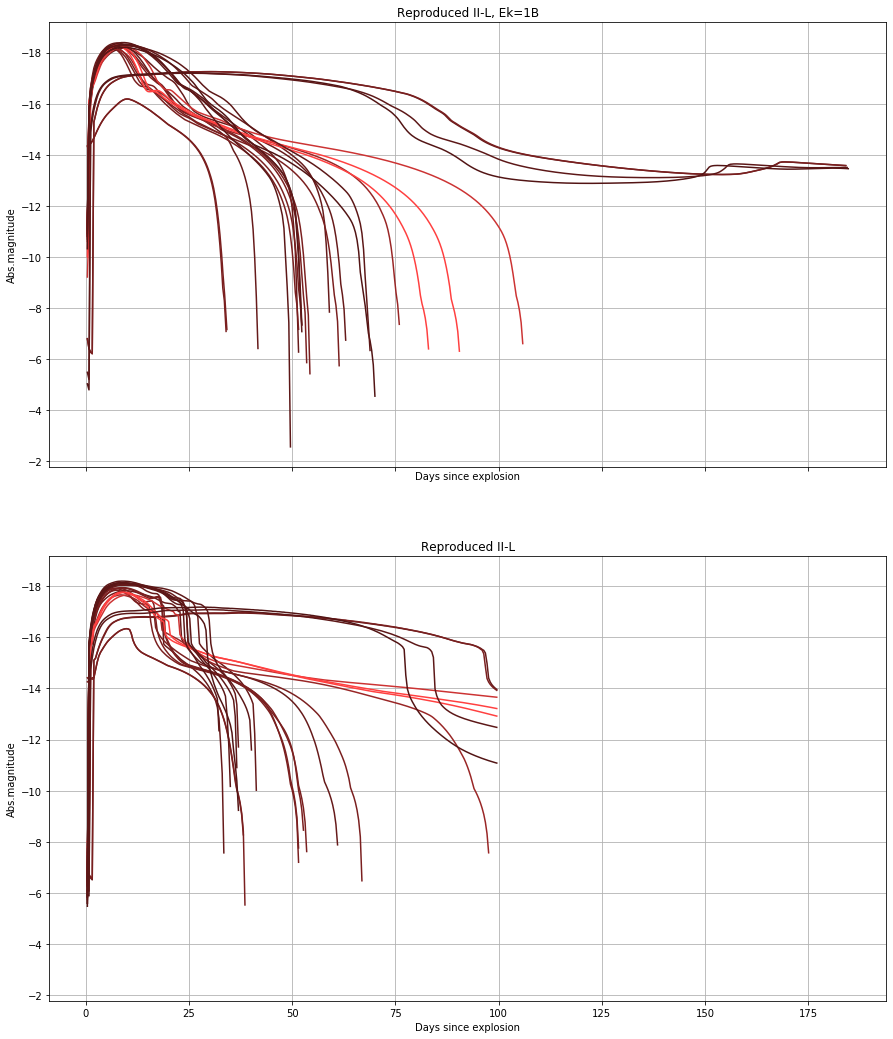

In [3]:
curvepops_path = {}
fig, AX = plt.subplots(2,1,figsize = (15,18),sharex = True, sharey = True)

for name in namedict.keys():
    JJ_results_path = 'D:/20-intern/CURVEPOPS1-release-31-10-18/SNEC-models/'+str(name)+'/data/magnitudes.dat'
    My_results_path = 'D:/20-intern/CURVEPOPS1-release-31-10-18/JJ-IIL-full_test/'+str(namedict[name][5:])+'magnitudes.dat'
    My_results_path_E51 = 'D:/20-intern/CURVEPOPS1-release-31-10-18/JJ-IIL-full_test_Ek51/'\
    +str(namedict[name][5:])+'magnitudes.dat'
    #curvepops path 저장
    curvepops_path[namedict[name]] = JJ_results_path
    
    #JJ result plot
    data = pd.read_csv(JJ_results_path,sep = '\s+',header = None)
    Time = [float(data[0][j*20])/86400 for j in range(len(data[0])//20)]
    V_mag = [float(data[10][k*20]) for k in range(len(data[10])//20)]
    mask = [idx for idx, value in enumerate(Time) if value>0.15]
    #My result plot
    DATA = pd.read_csv(My_results_path,sep = '\s+', header = None)
    TIME = [float(DATA[0][j*20])/86400 for j in range(len(DATA[0])//20)]
    V_MAG = [float(DATA[10][k*20]) for k in range(len(DATA[10])//20)]
    MASK = [idx for idx, value in enumerate(TIME) if value>0.15]
    #My results, especially Ek51 plot
    data_E51 = pd.read_csv(My_results_path_E51, sep = '\s+', header = None)
    Time_E51 = [float(data_E51[0][j*20])/86400 for j in range(len(data_E51[0])//20)]
    V_mag_E51 = [float(data_E51[10][k*20]) for k in range(len(data_E51[10])//20)]
    mask_E51 = [idx for idx, value in enumerate(Time_E51) if value>0.15]
    
    #print([float(num) for num in namedict[name].split('-') if num.isdigit()])       ### isdigit은 어떻게 소수를 읽는가
    param = [float(num) for num in namedict[name].split('-') if num.isdigit()][0]
    #param__ = [float(num) for num in namedict[name].split('-') if num.isdigit()][0]
    #JJs
    T = list(map(Time.__getitem__,mask))
    V = list(map(V_mag.__getitem__,mask))
    #Mine
    T_me = list(map(TIME.__getitem__,MASK))
    V_me = list(map(V_MAG.__getitem__,MASK))
    if V_me[-1]<-8:
        print(namedict[name][5:])
    #Mine_E51
    T_E51 = list(map(Time_E51.__getitem__, mask_E51))
    V_E51 = list(map(V_mag_E51.__getitem__, mask_E51))
    
    
    AX[0].plot(T,V,c = (0.04*param,0.01*param,0.01*param))
    AX[0].set_title("Reproduced II-L, Ek=1B")
    AX[1].plot(T_me,V_me, c = (0.04*param,0.01*param,0.01*param))
    AX[1].set_title("Reproduced II-L")
    #AX[2].plot(T_E51, V_E51, c = (0.04*param,0.01*param,0.01*param))
    #AX[2].set_title(r"Reproduced II-L, $E_{k} = 10^{51}erg$")
    
AX[0].invert_yaxis()
AX[0].set_xlabel("Days since explosion");AX[0].set_ylabel("Abs.magnitude")
AX[0].grid(True)
AX[1].set_xlabel("Days since explosion");AX[1].set_ylabel("Abs.magnitude")
AX[1].grid(True)
#AX[2].set_xlabel("Days since explosion");AX[2].set_ylabel("Abs.magnitude")
#AX[2].grid(True)
plt.show()

In [47]:
print(namedict)

{'DE-input-z014-10-0.3-0': 'z014-10-0.3-0', 'DE-input-z014-10-0.3-0.6': 'z014-10-0.3-0.6', 'DE-input-z014-10-0.6-2.8': 'z014-10-0.6-2.8', 'DE-input-z014-10-0.8-2.6': 'z014-10-0.8-2.6', 'DE-input-z014-10-0.9-2.6': 'z014-10-0.9-2.6', 'DE-input-z014-12-0.1-0': 'z014-12-0.1-0', 'DE-input-z014-12-0.1-0.6': 'z014-12-0.1-0.6', 'DE-input-z014-12-0.4-2.8': 'z014-12-0.4-2.8', 'DE-input-z014-12-0.5-2': 'z014-12-0.5-2', 'DE-input-z014-12-0.5-2.8': 'z014-12-0.5-2.8', 'DE-input-z014-12-0.6-2': 'z014-12-0.6-2', 'DE-input-z014-12-0.6-2.8': 'z014-12-0.6-2.8', 'DE-input-z014-12-0.9-2.6': 'z014-12-0.9-2.6', 'DE-input-z014-15-0.9-2.8': 'z014-15-0.9-2.8', 'DE-input-z014-20-0.1-3.2': 'z014-20-0.1-3.2', 'DE-input-z014-25-0.8-3.4': 'z014-25-0.8-3.4', 'DE-input-z014-25-0.9-3.4': 'z014-25-0.9-3.4', 'DE-input-z014-8-0.1-0': 'z014-8-0.1-0', 'DE-input-z014-8-0.1-0.4': 'z014-8-0.1-0.4', 'DE-input-z014-9-0.1-0': 'z014-9-0.1-0', 'DE-input-z014-9-0.1-0.4': 'z014-9-0.1-0.4', 'DE-input-z014-9-0.1-2.8': 'z014-9-0.1-2.8',

# Useful informations<br>
**1. How to extract numbers in strings :** https://www.geeksforgeeks.org/python-extract-numbers-from-string/ <br>
**2. How to invert all subplots in matplotlib :**<br>https://stackoverflow.com/questions/28132936/axes-invert-axis-does-not-work-with-sharey-true-for-matplotlib-subplots